# 因子选股

In [1]:
from scipy.optimize import minimize
import statsmodels.api as sm                 # for OLS result.
from statsmodels import regression           # for OLS.
import math                                  # math calculation.
import matplotlib.pyplot as plt              # specify "plt".
import seaborn as sns                        # for plotting.
import numpy as np                           # for numerical manipulation.
import pandas as pd                          # for wrapping csv file.
import os                                    # for getting working directory.
path = os.getcwd()
sns.set(style="darkgrid")                    # set seaborn style.
#plt.rcParams['font.sans-serif'] = ['SimHei']  # For displaying chinese.
plt.rcParams['axes.unicode_minus'] = False   # For displaying minus sign.
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #MAC中文显示
import gc, argparse, sys,  errno
%pylab inline
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from numpy import sign, log, sqrt
from datetime import datetime, timedelta
import h5py
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from copy import deepcopy

/Users/james/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Populating the interactive namespace from numpy and matplotlib


## 读取数据

In [2]:
cd ..

/Users/mm/Desktop/courses/20_spring


In [3]:
dataIndicator = pd.read_csv('data/AShareEODDerivativeIndicator.csv').drop(columns='Unnamed: 0')
dataPrice= pd.read_csv("data/AShareEODPrices0927.csv").drop(columns='Unnamed: 0')

In [4]:
dataIndicator.head()

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_VAL_MV,S_DQ_MV,S_PQ_HIGH_52W_,S_PQ_LOW_52W_,S_VAL_PE,S_VAL_PB_NEW,...,NET_CASH_FLOWS_OPER_ACT_TTM,NET_CASH_FLOWS_OPER_ACT_LYR,OPER_REV_TTM,OPER_REV_LYR,NET_INCR_CASH_CASH_EQU_TTM,NET_INCR_CASH_CASH_EQU_LYR,UP_DOWN_LIMIT_STATUS,LOWEST_HIGHEST_STATUS,OPDATE,OPMODE
0,{0F8ED9F0-D66F-B87F-E053-1001C80ADA4C},002457.SZ,20150221,CNY,377535.984,319058.9372,11.63,8.1,33.2800,2.1693,...,3.416806e+08,223050312.6,1.101673e+09,1.238926e+09,-3.223647e+08,1.225136e+08,NaN,NaN,2015-02-21 15:15:35,0
1,{0FA2F7C3-CBF3-FD06-E053-1001C80AD661},002457.SZ,20150222,CNY,377535.984,319058.9372,11.63,8.1,33.2800,2.1693,...,3.416806e+08,223050312.6,1.101673e+09,1.238926e+09,-3.223647e+08,1.225136e+08,NaN,NaN,2015-02-22 15:15:16,0
2,{0FB715A6-DCC1-3CF3-E053-1001C80AF5CD},002457.SZ,20150223,CNY,377535.984,319058.9372,11.63,8.1,33.2800,2.1693,...,3.416806e+08,223050312.6,1.101673e+09,1.238926e+09,-3.223647e+08,1.225136e+08,NaN,NaN,2015-02-23 15:15:24,0
3,{0FCB12DB-A715-058D-E053-1001C80A5676},002457.SZ,20150224,CNY,377535.984,319058.9372,11.63,8.1,33.2800,2.1693,...,3.416806e+08,223050312.6,1.101673e+09,1.238926e+09,-3.223647e+08,1.225136e+08,NaN,NaN,2015-02-24 15:15:20,0
4,{0FDF0A6C-80D7-56B4-E053-1001C80AD325},002457.SZ,20150225,CNY,375526.032,317360.3093,11.63,8.1,33.1028,2.1578,...,3.416806e+08,223050312.6,1.101673e+09,1.238926e+09,-3.223647e+08,1.225136e+08,0.0,0.0,2015-02-25 15:15:48,0


In [5]:
dataPrice.head()

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,...,S_DQ_ADJPRECLOSE,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_ADJFACTOR,S_DQ_AVGPRICE,S_DQ_TRADESTATUS,OPDATE,OPMODE
0,{7D1A7FA4-F4A7-4B23-A838-D194C5B7D186},000678.SZ,20150105,CNY,6.57,6.37,6.50,6.22,6.41,-0.16,...,32.59,31.59,32.24,30.85,31.79,4.959914,6.3512,??,2015-01-05 15:06:22,0
1,{F0CE8587-97DA-4BCB-80B0-EE690BE70615},000726.SZ,20150105,CNY,11.99,12.11,12.79,12.11,12.45,0.46,...,77.38,78.15,82.54,78.15,80.35,6.453594,12.4381,??,2015-01-05 15:06:22,0
2,{4F1997CA-D1D2-48AF-9E27-228DCC792E6A},000732.SZ,20150105,CNY,16.45,16.98,17.85,16.78,17.42,0.97,...,34.88,36.01,37.85,35.58,36.94,2.120472,17.4115,??,2015-01-05 15:06:22,0
3,{2A8F6241-3C77-4CC6-A81C-969462D3E8CB},000776.SZ,20150105,CNY,25.95,26.17,26.50,25.20,26.06,0.11,...,126.34,127.41,129.02,122.69,126.88,4.868622,25.9175,??,2015-01-05 15:06:22,0
4,{0EF83912-D729-42B9-807F-69DADDB7A525},000789.SZ,20150105,CNY,13.69,13.72,14.26,13.66,14.13,0.44,...,33.78,33.85,35.18,33.70,34.86,2.467255,13.9760,??,2015-01-05 15:06:22,0


In [6]:
Indicator = dataIndicator[["S_INFO_WINDCODE","TRADE_DT","S_VAL_MV","S_VAL_PE_TTM","S_VAL_PE","S_VAL_PB_NEW","TOT_SHR_TODAY","OPER_REV_TTM"]]
Price= dataPrice[["S_INFO_WINDCODE","TRADE_DT","S_DQ_ADJCLOSE"]]
data = pd.merge(Indicator,Price,on=["S_INFO_WINDCODE","TRADE_DT"])

In [8]:
data.rename(columns = {"S_INFO_WINDCODE":"stkcd","TRADE_DT":"date"},inplace=True)
data.sort_values(["stkcd","date"],ascending = [True,True],inplace = True)
data.columns,data.shape
# save to hdf5 format
data.to_hdf('data/merge_data.h5', 'merge_data', table=True, mode='a')


In [17]:
data.iloc[:100,:].to_csv('data/test_data.csv')

In [ ]:
# 从这里用测试数据做

In [344]:
data = pd.read_table('test_data.csv',sep=',',index_col=0)
data.head()

,stkcd,date,S_VAL_MV,S_VAL_PE_TTM,S_VAL_PE,S_VAL_PB_NEW,TOT_SHR_TODAY,OPER_REV_TTM,S_DQ_ADJCLOSE
612858,000001.SZ,20150105,1.830268e+07,9.5183,12.0167,1.4442,1.142489e+06,6.949500e+10,1138.28
612862,000001.SZ,20150106,1.802848e+07,9.3757,11.8367,1.4225,1.142489e+06,6.949500e+10,1121.23
612863,000001.SZ,20150107,1.768574e+07,9.1974,11.6117,1.3955,1.142489e+06,6.949500e+10,1099.91
612864,000001.SZ,20150108,1.709164e+07,8.8885,11.2216,1.3486,1.142489e+06,6.949500e+10,1062.96
612865,000001.SZ,20150109,1.722874e+07,8.9598,11.3116,1.3594,1.142489e+06,6.949500e+10,1071.49


## 数据处理

In [345]:
#####填充缺失值
data.fillna(method = 'ffill', inplace = True)
data.fillna(0, inplace = True)

In [346]:
data.shape

(10000, 9)

# 因子构建

## 因子构建

In [347]:
for col in data.columns[2:]:
    print (col)

S_VAL_MV
S_VAL_PE_TTM
S_VAL_PE
S_VAL_PB_NEW
TOT_SHR_TODAY
OPER_REV_TTM
S_DQ_ADJCLOSE


In [348]:
######常规因子
def general_factor(data):
    data["net_asset"] = data["S_VAL_MV"]/data["S_VAL_PB_NEW"]

    data["net_profit_TTM"] =  data["S_VAL_MV"]/data["S_VAL_PE_TTM"]
    data["net_profit"] =  data["S_VAL_MV"]/data["S_VAL_PE"]

    data["ROE_TTM"] = data["net_profit_TTM"]/data["TOT_SHR_TODAY"]
    data["ROE"] = data["net_profit"]/data["TOT_SHR_TODAY"]

    data["net_profit_TTM_change_rate"] = data.groupby("stkcd")["net_profit_TTM"].pct_change()
    data["ROE_change_rate"] = data.groupby("stkcd")["ROE"].pct_change()

    data["revenues_change_rate"] = data.groupby("stkcd")["OPER_REV_TTM"].pct_change()

    data["ret"] = data.groupby("stkcd")["S_DQ_ADJCLOSE"].pct_change()
    return data

In [349]:
data = general_factor(data)
data.fillna(method = 'ffill', inplace = True)
data.fillna(0, inplace = True)

In [350]:
######barrabooktomarket
def get_book2mkt(data):
    b2m = data['total_share']/data['mktvalue']
    return b2m

In [351]:
get_book2mkt(data)

KeyError: 'total_share'

In [352]:
######barraSIZE
# 因为使用了log2，这个函数需要对data而不是data_normalized操作
def get_size(data, factor_name, scale=False):
    '''
    use data.loc[factor_name] as x
    check that X is n_samples*1 shape!! it is important, the model only accept 2D array! and the shape must be n*1
    '''
    X = np.log(np.array(data[factor_name]).reshape(-1,1))
    #不要用apply！
    return X

#log(size)为因子

In [353]:
get_size(data, 'S_DQ_ADJCLOSE', scale=False)

array([[7.03727363],
       [7.02218158],
       [7.00298364],
       ...,
       [4.07278038],
       [4.04111958],
       [4.04497923]])

In [354]:
######BARRA non-liner SIZE
def get_nolsize(data, factor_name, scale=False):
    '''
    use data.loc[factor_name] as x
    check that X is n_samples*1 shape!! it is important, the model only accept 2D array! and the shape must be n*1
    '''
    reg = linear_model.LinearRegression()
    X = np.array(data[factor_name]).reshape(-1,1)
    if scale:
        scaler = MinMaxScaler(feature_range = (0,1))
        X = scaler.fit_transform(X)
    y = X**3
    res = (y - reg.fit(X,y).predict(X)).ravel()
    return res
    

In [355]:
for col in data_normalized.columns[2:]:
    data['nolsize'+col] = get_nolsize(data, col, scale=False)

In [356]:
data

,stkcd,date,S_VAL_MV,S_VAL_PE_TTM,S_VAL_PE,S_VAL_PB_NEW,TOT_SHR_TODAY,OPER_REV_TTM,S_DQ_ADJCLOSE,net_asset,...,ROE_change_rate,revenues_change_rate,ret,nolsizeS_VAL_MV,nolsizeS_VAL_PE_TTM,nolsizeS_VAL_PE,nolsizeS_VAL_PB_NEW,nolsizeTOT_SHR_TODAY,nolsizeOPER_REV_TTM,nolsizeS_DQ_ADJCLOSE
612858,000001.SZ,20150105,1.830268e+07,9.5183,12.0167,1.4442,1.142489e+06,6.949500e+10,1138.28,1.267323e+07,...,0.000000e+00,0.0,0.000000,-6.542013e+21,1.257911e+09,9.300788e+08,3358.494158,-9.960990e+17,-3.263928e+33,-1.051799e+10
612862,000001.SZ,20150106,1.802848e+07,9.3757,11.8367,1.4225,1.142489e+06,6.949500e+10,1121.23,1.267380e+07,...,-2.151628e-06,0.0,-0.014979,-6.603271e+21,1.259922e+09,9.316140e+08,3384.065332,-9.960990e+17,-3.263928e+33,-1.035398e+10
612863,000001.SZ,20150107,1.768574e+07,9.1974,11.6117,1.3955,1.142489e+06,6.949500e+10,1099.91,1.267341e+07,...,-2.783347e-06,0.0,-0.019015,-6.668421e+21,1.262436e+09,9.335330e+08,3415.887604,-9.960990e+17,-3.263928e+33,-1.014615e+10
612864,000001.SZ,20150108,1.709164e+07,8.8885,11.2216,1.3486,1.142489e+06,6.949500e+10,1062.96,1.267362e+07,...,3.822456e-06,0.0,-0.033594,-6.751958e+21,1.266793e+09,9.368602e+08,3471.178510,-9.960990e+17,-3.263928e+33,-9.778883e+09
612865,000001.SZ,20150109,1.722874e+07,8.9598,11.3116,1.3594,1.142489e+06,6.949500e+10,1071.49,1.267378e+07,...,1.134605e-06,0.0,0.008025,-6.735939e+21,1.265787e+09,9.360926e+08,3458.444676,-9.960990e+17,-3.263928e+33,-9.864451e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360117,000010.SZ,20180111,4.787952e+05,156.3841,120.0676,2.1487,8.198547e+04,9.854963e+08,62.92,2.228302e+05,...,5.077470e-07,0.0,-0.021766,9.902786e+20,-8.095388e+08,1.019751e+07,2530.880735,1.319817e+17,6.311651e+32,2.469252e+09
2360118,000010.SZ,20180112,4.910930e+05,160.4008,123.1515,2.2038,8.198547e+04,9.854963e+08,64.54,2.228392e+05,...,2.280394e-07,0.0,0.025747,9.808601e+20,-8.658847e+08,-1.596951e+07,2466.394465,1.319817e+17,6.311651e+32,2.447485e+09
2360119,000010.SZ,20180115,4.468208e+05,145.9406,112.0494,2.0052,8.198547e+04,9.854963e+08,58.72,2.228310e+05,...,-3.441650e-07,0.0,-0.090177,1.014769e+21,-6.629685e+08,7.826389e+07,2699.007111,1.319817e+17,6.311651e+32,2.525688e+09
2360120,000010.SZ,20180116,4.328833e+05,141.3883,108.5543,1.9426,8.198547e+04,9.854963e+08,56.89,2.228371e+05,...,-1.740484e-07,0.0,-0.031165,1.025445e+21,-5.990486e+08,1.079475e+08,2772.428701,1.319817e+17,6.311651e+32,2.550280e+09


$R_{i}-R_{f}=\alpha+\beta\left(R_{m}-R_{f}\right)+\varepsilon_{i}$

个股超额收益率与市场加权超额收益率做加权回归。指数加权移动平均（Exponentially Weighted Moving Average， EWMA），是BARRA中常用的一种加权方式，按照时间远近呈指数衰减，按照指数加权移动平均，对于参数的估计为：

$$
\begin{array}{l}\beta=\frac{\sum_{i=0}^{t} w_{i}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=0}^{t} w_{i}\left(x_{i}-\bar{x}\right)^{2}} \\ w_{i}=\left(0.5^{\frac{1}{63}}\right)^{i}, i \in[252,0]\end{array}
$$

其中，t是数据的时间窗口长度减1，此处为503，$x_0$ 是距离现在最近的数据，权重为$w_0$
- http://cslt.riit.tsinghua.edu.cn/mediawiki/images/4/47/MSCI-USE4-201109.pdf
- https://zhuanlan.zhihu.com/p/118524019
- https://www.zhihu.com/question/49694102
- https://zhuanlan.zhihu.com/p/31412967

In [278]:
reg = linear_model.LinearRegression()
rf = 0.1 #以0.1作为市场无风险利率，数据可得话可以调整
data['ar']=data['ret']-rf
y = np.array(data['ar']).reshape(-1,1)
#X = np.array(data_normalized.iloc[:,2:])#.reshape(-1,1) 
X = np.array(data_normalized[col]).reshape(-1,1) 

beta = reg.fit(X,y).coef_

#check self implementation
for col in data_normalized.columns[2:]:
    X = np.array(data_normalized[col]).reshape(-1,1) 
    beta = reg.fit(X,y).coef_
    print (beta)
    print (((X - X.mean())*(y - y.mean())).sum()/((X - X.mean())**2).sum())

In [ ]:
#自己实现最小二乘估计beta
XtX = np.dot(X.T , X)
lamba = 0.001
if np.linalg.det(XtX+lamba*np.eye(XtX.shape[0])) == 0.0:
    print('Can not resolve the problem')
beta = np.linalg.solve(XtX+lamba*np.eye(XtX.shape[0]), np.dot(X.T ,y)) # xtx.I * (xmat.T * ymat)

In [313]:
#自己实现指数加权移动平均最小二乘估计beta
if X.shape[0] >=252:
    w_i = 0.5**(np.arange(0,252)[::-1]/63)
else:
    w_i = 0.5**(np.arange(0,X.shape[0])[::-1]/63)
XtX = np.dot(X.T , X)
lamba = 0.001
if np.linalg.det(XtX+lamba*np.eye(XtX.shape[0])) == 0.0:
    print('Can not resolve the problem')
beta_equal_weight = ((X - X.mean()) * (y - y.mean())).sum()/((X - X.mean())**2).sum()
beta_moving_average_exp = (w_i*(X - X.mean()) * (y - y.mean())).sum()/(w_i*(X - X.mean())**2).sum()
beta,beta_moving_average_exp

 ((X - X.mean()) * (y - y.mean())).sum(),(w_i*(X - X.mean()) * (y - y.mean())).sum()
    ((X - X.mean())**2).sum(), (w_i*(X - X.mean())**2).sum()

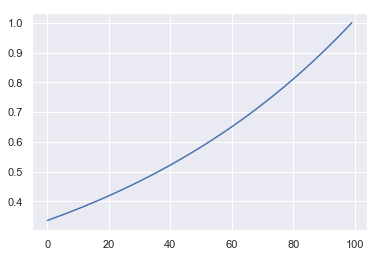

In [297]:
if X.shape[0] >=252:
    w_i = 0.5**(np.arange(0,252)[::-1]/63)
else:
    w_i = 0.5**(np.arange(0,X.shape[0])[::-1]/63)
w_i
plot(w_i)

In [333]:
for col in data_normalized.columns[2:]:
    X = np.array(data_normalized.iloc[:,2:])
    #X = np.array(data_normalized[col]).reshape(-1,1) 
    beta = reg.fit(X,y).coef_
    print (beta)
res = np.dot(X,beta.T) - y

for col in data_normalized.columns[2:]:
    #X = np.array(data_normalized.iloc[:,2:])
    X = np.array(data_normalized[col]).reshape(-1,1) 
    XtX = np.dot(X.T , X)
    lamba = 0.001
    if np.linalg.det(XtX+lamba*np.eye(XtX.shape[0])) == 0.0:
        print('Can not resolve the problem')
    beta = np.linalg.solve(XtX+lamba*np.eye(XtX.shape[0]), np.dot(X.T ,y)) # xtx.I * (xmat.T * ymat)
    print (beta)
res1 = np.dot(X,beta) - y

#checked that self implementation is just the same with official

[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[ 1.58118406 -1.11944541  0.01316689  0.37275548 -0.04070343 -0.09188837
  -0.71988842]]
[[0.00289308]]
[[0.00325707]]
[[0.00024745]]
[[0.00344197]]
[[-0.00207448]]
[[0.00053972]]
[[0.00289153]]


plot(res)
plot(res1)

In [444]:
######BARRA beta
def get_beta(X_df, y_df):
    #reg = linear_model.LinearRegression()
    rf = 0.1 #以0.1作为市场无风险利率，数据可得话可以调整
    y_df = y_df-rf
    X =  np.array(X_df).reshape(-1,1)
    y =  np.array(y_df).reshape(-1,1)
    #y = np.array(data['ar']).reshape(-1,1)
    #X = np.array(data[col]).reshape(-1,1)
    #X = np.array(data.groupby("stkcd")["ar"].mean()).reshape(-1,1)
    #需要改！！X是市值加权指数（如中证全指、万德全A指数）超额收益日序列
    #beta = reg.fit(X,y).coef_
    ####### ar=α + β *rm（市场收益率，所有股票ar的平均）+error;
    
    if X.shape[0] >=252:
        w_i = 0.5**(np.arange(0,252)[::-1]/63)
    else:
        w_i = 0.5**(np.arange(0,X.shape[0])[::-1]/63)
    XtX = np.dot(X.T , X)
    lamba = 0.001
    if np.linalg.det(XtX+lamba*np.eye(XtX.shape[0])) == 0.0:
        print('Can not resolve the problem')
    beta_equal_weight = ((X - X.mean()) * (y - y.mean())).sum()/((X - X.mean())**2).sum()
    beta_moving_average_exp = (w_i*(X - X.mean()) * (y - y.mean())).sum()/(w_i*(X - X.mean())**2).sum()
    return beta_moving_average_exp

data['beta'] = 0
for stock in tqdm(np.unique(data['stkcd'])):
    tmpdf = data[data['stkcd'] == stock]
    tmpdf = tmpdf.set_index('date')
    stock_ret_tmp = pd.DataFrame(tmpdf.loc[:,'ret'])
    beta_df = pd.DataFrame(data.groupby('date').mean()['ret'])
    #beta_df.head()
    intersect_tmp_ind = np.intersect1d(stock_ret_tmp.index,beta_df.index)
    X_df_tmp_all = beta_df.loc[intersect_tmp_ind]
    y_df_tmp_all = stock_ret_tmp.loc[intersect_tmp_ind]
    stock_ret_tmp['beta'] = 0
    for i in range(2,X_df_tmp_all.shape[0]):
    #从头开始循环
        if i <=252:
            X_df = X_df_tmp_all.iloc[:i]
            y_df = y_df_tmp_all.iloc[:i]
            #print (X_df.shape, y_df.shape)
            beta = get_beta(X_df, y_df)
            #print (beta)
        else:
            X_df = X_df_tmp_all.iloc[i-252:i]
            y_df = y_df_tmp_all.iloc[i-252:i]
            #print (X_df.shape, y_df.shape)
            beta = get_beta(X_df, y_df)
            #print (beta)
        stock_ret_tmp['beta'].iloc[i] = beta
    #data[data['stkcd'] ==stock].iloc[:]['beta'] = np.array(stock_ret_tmp['beta'])
    data.loc[data['stkcd'] ==stock,'beta']= np.array(stock_ret_tmp['beta'])

In [446]:
data

,stkcd,date,S_VAL_MV,S_VAL_PE_TTM,S_VAL_PE,S_VAL_PB_NEW,TOT_SHR_TODAY,OPER_REV_TTM,S_DQ_ADJCLOSE,net_asset,...,revenues_change_rate,ret,nolsizeS_VAL_MV,nolsizeS_VAL_PE_TTM,nolsizeS_VAL_PE,nolsizeS_VAL_PB_NEW,nolsizeTOT_SHR_TODAY,nolsizeOPER_REV_TTM,nolsizeS_DQ_ADJCLOSE,beta
612858,000001.SZ,20150105,1.830268e+07,9.5183,12.0167,1.4442,1.142489e+06,6.949500e+10,1138.28,1.267323e+07,...,0.0,0.000000,-6.542013e+21,1.257911e+09,9.300788e+08,3358.494158,-9.960990e+17,-3.263928e+33,-1.051799e+10,0.000000
612862,000001.SZ,20150106,1.802848e+07,9.3757,11.8367,1.4225,1.142489e+06,6.949500e+10,1121.23,1.267380e+07,...,0.0,-0.014979,-6.603271e+21,1.259922e+09,9.316140e+08,3384.065332,-9.960990e+17,-3.263928e+33,-1.035398e+10,0.000000
612863,000001.SZ,20150107,1.768574e+07,9.1974,11.6117,1.3955,1.142489e+06,6.949500e+10,1099.91,1.267341e+07,...,0.0,-0.019015,-6.668421e+21,1.262436e+09,9.335330e+08,3415.887604,-9.960990e+17,-3.263928e+33,-1.014615e+10,1.649589
612864,000001.SZ,20150108,1.709164e+07,8.8885,11.2216,1.3486,1.142489e+06,6.949500e+10,1062.96,1.267362e+07,...,0.0,-0.033594,-6.751958e+21,1.266793e+09,9.368602e+08,3471.178510,-9.960990e+17,-3.263928e+33,-9.778883e+09,0.400271
612865,000001.SZ,20150109,1.722874e+07,8.9598,11.3116,1.3594,1.142489e+06,6.949500e+10,1071.49,1.267378e+07,...,0.0,0.008025,-6.735939e+21,1.265787e+09,9.360926e+08,3458.444676,-9.960990e+17,-3.263928e+33,-9.864451e+09,1.258957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360117,000010.SZ,20180111,4.787952e+05,156.3841,120.0676,2.1487,8.198547e+04,9.854963e+08,62.92,2.228302e+05,...,0.0,-0.021766,9.902786e+20,-8.095388e+08,1.019751e+07,2530.880735,1.319817e+17,6.311651e+32,2.469252e+09,1.473394
2360118,000010.SZ,20180112,4.910930e+05,160.4008,123.1515,2.2038,8.198547e+04,9.854963e+08,64.54,2.228392e+05,...,0.0,0.025747,9.808601e+20,-8.658847e+08,-1.596951e+07,2466.394465,1.319817e+17,6.311651e+32,2.447485e+09,1.470034
2360119,000010.SZ,20180115,4.468208e+05,145.9406,112.0494,2.0052,8.198547e+04,9.854963e+08,58.72,2.228310e+05,...,0.0,-0.090177,1.014769e+21,-6.629685e+08,7.826389e+07,2699.007111,1.319817e+17,6.311651e+32,2.525688e+09,1.475446
2360120,000010.SZ,20180116,4.328833e+05,141.3883,108.5543,1.9426,8.198547e+04,9.854963e+08,56.89,2.228371e+05,...,0.0,-0.031165,1.025445e+21,-5.990486e+08,1.079475e+08,2772.428701,1.319817e+17,6.311651e+32,2.550280e+09,1.527039


In [23]:
######BARRAleverage
def get_leverage(data):
    '''
    use data.loc[factor_name] as x
    check that X is n_samples*1 shape!! it is important, the model only accept 2D array! and the shape must be n*1
    '''
    data['mlev'] = (data['me']+data['pe']+data['ld'])/data['me']
    data['dtoa'] = data['td']/data['ta']
    data['blev'] = (data['be']+data['pe']+data['ld'])/data['be']
    data['leverage'] = 0.38*data['mlev']+0.35*data['dtoa']+0.27*data['blev']
    return 


In [24]:
get_leverage(data)

KeyError: 'me'

In [49]:
#######BarraLiquidity
def BarraLiquidity(data):
    Liquidity = ['STOM','STOQ','STOA']
    statemap = {'STOM':['trade_volumn','total_share'],'STOQ':['trade_volumn','total_share'],'STOA':['trade_volumn','total_share']}
    for factor in Liquidity:
        
        if factor == 'STOM':
            tempvalue = data['trade_volumn'] / data['total_share']
            factorvalue = tempvalue.rolling(21).sum()
            factorvalue[factorvalue <= 0] = 1
            factorvalue = factorvalue.apply(lambda x: math.log(x))
        elif factor == 'STOQ':
            tempvalue = data['trade_volumn'] / data['total_share']
            factorvalue = tempvalue.rolling(3*21).sum() / 3
            factorvalue[factorvalue <= 0] = 1
            factorvalue = factorvalue.apply(lambda x: math.log(x))
        elif factor == 'STOA':
            tempvalue = data['trade_volumn'] / data['total_share']
            factorvalue = tempvalue.rolling(12*21).sum() / 12
            factorvalue[factorvalue <= 0] = 1
            factorvalue = factorvalue.apply(lambda x: math.log(x))
            
            
            
            mkt=data['stkcd','date','close_price','total_share']
            mkt['final'] = mkt['close_price'] * mkt['total_share']    ##最终的市值
            
            ##找到每个月的月底
            mkt['isMonthEnd'] = False
            dates = mkt.index.values   
            mkt['date'] = [x[0] for x in dates]
            month_end_dates = []
            for i in range(len(mkt) - 1):
                if dates[i][0].month != dates[i+1][0].month:
                    mkt.iloc[i,1] = True
                    month_end_dates.append(dates[i][0])
            data.iloc[len(mkt)-1,1] = True
            month_end_dates.append(dates[len(mkt)-1][0])

            mkt['total_mkt'] = pd.Series()
            for i in range(len(month_end_dates)):
                temp = mkt[mkt.date == month_end_dates[i]]['final']
                total_sum = sum(temp.values)
                for j in range(len(mkt)):
                    if mkt.iloc[j,2] == month_end_dates[i]:
                        mkt.iloc[j,3] = total_sum

            ##把每一天的权重设成该月月底占市值权重
            mkt['weights'] = (mkt['final'] / mkt['total_mkt']).fillna(method='bfill')
            daily_value = state['trade_volumn'] / state['total_share']
            factorvalue = (daily_value * mkt['weights']).rolling(21*12).sum() / 12

        if factor in [x[1:] for x in st.keys()]:
            existday = st.select_column(factor, 'index')
            st.append(factor, factorvalue.loc[factorvalue.index.difference(existday)], format='t')
        else:
            st.append(factor, factorvalue, format='t')
        st.close()


In [50]:
BarraLiquidity(data)

KeyError: 'trade_volumn'

In [ ]:
#####Barra momentum

def BarraMomentum(dates):
    Momentum = ['STREV','Seasonality','INDMOM','RSTR','HALPHA']
    statemap = {'STREV':['sec_return'],'Seasonality':['sec_return'], 'INDMOM':['sec_return'],'RSTR':['sec_return'],
        'HALPHA':['sec_return']}

    for factor in Momentum:
        fcl = ['date'] + statemap[factor]

        if factor in ['STREV', 'INDMOM', 'RSTR', 'HALPHA']:
            ##set the risk_free return to be 0.1 for everyday, can change if data available
            state['rf_return'] = pd.Series()
            state['rf_return'] = state['rf_return'].fillna(0.1)

        if factor in ['INDMOM','HALPHA']:
            dates = state.index.get_level_values('date')
            stocks = state.index.get_level_values('sec_code')
            state['secID'] = stocks
            state['dates'] = dates
            dates = dates.drop_duplicates()
            stocks = stocks.drop_duplicates()

        if factor == 'STREV':
            sec_return = state['sec_return']
            rf_return = state['rf_return']
            RS = abs(sec_return.copy(deep=True) * 0.0)
            factorvalue = abs(sec_return.copy(deep=True) * 0.0)

            for i in range(len(sec_return.iloc[0,:])):
                each_sec = sec_return.iloc[:,i]
                each_df = rf_return.iloc[:,i]
                for k in range(len(each_sec)-1, 62, -1):
                    RS.iloc[k,i] = cal_RS(k, each_sec, each_df, 63, 10)
                factorvalue.iloc[:,i] = RS.rolling(3).mean()

        elif factor == 'Seasonality':
            factorvalue = abs(state.copy(deep=True) * 0.0)

            for i in range(len(state.iloc[0, :])):
                each_stock = abs(state.iloc[:,i].copy(deep=True) * 0.0)
                mean_on_day = abs(each_stock.copy(deep=True) * 0.0)
                for j in range(len(each_stock) - 23, 0, -1):
                    mean_on_day.iloc[j] = state.iloc[j+1:j+22,i].mean()
                for k in range(len(mean_on_day)-1, 251, -1):
                    t = k
                    y = 1
                    temp_sum = 0
                    while t > 0 and y < 6:
                        temp_sum += mean_on_day.iloc[t]
                        t = t - y * 252
                        y = y + 1
                    each_stock.iloc[k] = temp_sum / y
                factorvalue.iloc[:,i] = each_stock

        elif factor == 'INDMOM':
            # 分红数据
            if DB_CONN == 1:
                dividend = pd.read_sql("""select sec_code,cast(ex_date as varchar) as date,cast(reg_date as varchar) as reg_date,bonus_ratio 
                                                                  from tbas..tCOM_dividend where div_type = 1""",
                                       con=conn, index_col=['date', 'sec_code'], parse_dates=['date', 'reg_date'])
            else:
                dividend = pd.read_csv(r'data/datadividend.csv', index_col=None, parse_dates=['date', 'reg_date'],
                                       encoding='gbk')
                dividend['sec_code'] = [('00000' + str(x))[-6:] for x in dividend['sec_code']]
                dividend = dividend.set_index(['date', 'sec_code'])
            dividend = dividend.reset_index()
            dividend = dividend.drop_duplicates(
                ['date', 'sec_code'])  ###the date and bonus ratio for each divident for each stock
            dividend = dividend.set_index(['reg_date', 'sec_code'])
            dividend['share'] = mkt['total_share']
            dividend = dividend.dropna()
            dividend['dividend'] = dividend['bonus_ratio'] * dividend['share'] / 10.0
            dividend = dividend.reset_index()
            dividend = dividend.set_index(['date', 'sec_code'])

            # 行业信息
            if DB_CONN == 1:
                sector = pd.read_sql("""select t1.sec_code,cast(t1.enter_date as varchar) as date,t1.sector_code,t2.group_code
                                                      from tbas..tSECTOR_config t1, tbas..tSECTOR_group_config t2
                                                      where t1.class_code=%d and t2.group_class=%d and t2.sector_code=t1.sector_code
                                                      order by t1.sec_code"""
                                         % (class_code, group_class),
                                         con=conn, index_col=['date', 'sec_code'], parse_dates=['date'])
            else:
                sector = pd.read_csv(r'data/datasector.csv', index_col=None, parse_dates=[0],encoding='gbk')  ##行业分类
                sector['sec_code'] = [('00000' + str(x))[-6:] for x in sector['sec_code']]  ##get their sec_ID code, end up with 000001,000003,...
                sector = sector.set_index(['date', 'sec_code'])

            new_state = pd.merge(state, sector, left_index=True, right_index=True, how='outer')
            new_state[['sector_code', 'group_code']] = new_state[['sector_code', 'group_code']].fillna(method='ffill')
            new_state = new_state.dropna()

            # 财务数据对齐
            tempa = tempa.unstack()
            tempa = tempa[(tempa.index.month.isin([3, 6, 9, 12]))].stack()

            nf = tempa.reset_index()
            tnf = nf['pdate'].groupby([nf['date'], nf['sec_code']]).max()
            nf = nf.set_index(['date', 'sec_code', 'pdate'])
            tnf = tnf.reset_index()
            tnf = tnf.set_index(['date', 'sec_code', 'pdate'])
            nf = nf[nf.index.isin(tnf.index)]
            nf = nf.reset_index('pdate')

            ##财报数据发布后，剔除分红
            dividend = dividend['dividend'].reindex(nf.index.union(dividend.index)).fillna(0)

            ##日度对齐
            nf = nf.unstack()
            nf = nf.reindex(nf.index.union(dates)).ffill()
            nf = nf.reindex(dates)
            dividend = dividend.unstack()
            dividend = dividend.reindex(dividend.index.union(dates)).ffill()
            dividend = dividend.reindex(dates)

            # 估值因子
            mkt = mkt.unstack()
            mkt = mkt.reindex(mkt.index.union(dates)).ffill()
            mkt = mkt.reindex(dates)
            tcap = mkt['close_price'] * mkt['total_share']
            tcap[tcap == 0] = np.nan

            industry = new_state.group_code.drop_duplicates()

            ##计算RS
            temp_array = []
            for i in range(len(stocks)):
                each_stock = new_state[new_state.secID==stocks[i]]
                sec_ret = each_stock.sec_return
                rf_ret = each_stock.rf_return
                RS = abs(sec_ret.copy(deep=True) * 0)

                for j in range(len(each_stock)-1, 125, -1):
                    RS.iloc[j] = cal_RS(j, sec_ret, rf_ret, 126, 21)
                each_stock['RS'] = RS

                each_stock['tcap'] = tcap.loc[:,stocks[i]].values
                temp_array.append(each_stock)
            all_data = pd.concat(temp_array)

            final = []
            for j in range(len(industry)):
                each_ind = all_data[all_data.group_code==industry[j]]
                for k in range(len(dates)):
                    each_day = each_ind[each_ind.dates==dates[k]]
                    each_day['weight'] = each_day['tcap'] / each_day['tcap'].sum()
                    iRS = (each_day['RS'] * each_day['weight']).sum()
                    each_day['ind_RS'] = [iRS] * len(each_day)
                    final.append(each_day)
            final_data = pd.concat(final)
            factorvalue = final_data['RS'] - final_data['weight'] * final_data['ind_RS']

        elif factor == 'RSTR':
            sec_return = state['sec_return']
            rf_return = state['rf_return']
            factorvalue = abs(sec_return.copy(deep=True) * 0.0)

            RS = abs(sec_return.copy(deep=True) * 0.0)
            for i in range(len(sec_return.iloc[0, :])):
                each_sec = sec_return.iloc[:, i]
                each_rf = rf_return.iloc[:, i]

                for k in range(len(each_sec) - 1, 503, -1):
                    RS.iloc[k, i] = cal_RS(k, each_sec, each_rf, 504, 126)
                factorvalue.iloc[:, i] = RS.shift(10).rolling(11).mean()

        elif factor == 'HALPHA':
            # 分红数据，处理市值用.
            if DB_CONN == 1:
                dividend = pd.read_sql("""select sec_code,cast(ex_date as varchar) as date,cast(reg_date as varchar) as reg_date,bonus_ratio 
                                                                  from tbas..tCOM_dividend where div_type = 1""",
                                       con=conn, index_col=['date', 'sec_code'], parse_dates=['date', 'reg_date'])
            else:
                dividend = pd.read_csv(r'data/datadividend.csv', index_col=None, parse_dates=['date', 'reg_date'],
                                       encoding='gbk')
                dividend['sec_code'] = [('00000' + str(x))[-6:] for x in dividend['sec_code']]
                dividend = dividend.set_index(['date', 'sec_code'])
            dividend = dividend.reset_index()
            dividend = dividend.drop_duplicates(
                ['date', 'sec_code'])  ###the date and bonus ratio for each divident for each stock
            dividend = dividend.set_index(['reg_date', 'sec_code'])
            dividend['share'] = mkt['total_share']
            dividend = dividend.dropna()
            dividend['dividend'] = dividend['bonus_ratio'] * dividend['share'] / 10.0
            dividend = dividend.reset_index()
            dividend = dividend.set_index(['date', 'sec_code'])

            # 财务数据对齐
            tempa = tempa.unstack()
            tempa = tempa[(tempa.index.month.isin([3, 6, 9, 12]))].stack()

            nf = tempa.reset_index()
            tnf = nf['pdate'].groupby([nf['date'], nf['sec_code']]).max()
            nf = nf.set_index(['date', 'sec_code', 'pdate'])
            tnf = tnf.reset_index()
            tnf = tnf.set_index(['date', 'sec_code', 'pdate'])
            nf = nf[nf.index.isin(tnf.index)]
            nf = nf.reset_index('pdate')

            ##财报数据发布后，剔除分红
            dividend = dividend['dividend'].reindex(nf.index.union(dividend.index)).fillna(0)

            ##日度对齐
            dividend = dividend.unstack()
            dividend = dividend.reindex(dividend.index.union(dates)).ffill()
            dividend = dividend.reindex(dates).fillna(0)

            # 估值因子
            mkt = mkt.unstack()
            mkt = mkt.reindex(mkt.index.union(dates)).ffill()
            mkt = mkt.reindex(dates)
            tcap = mkt['close_price'] * mkt['total_share'] + dividend
            tcap[tcap == 0] = np.nan

            total_weight = pd.DataFrame(dates, columns=['date'])
            total_weight['Rt'] = pd.Series()
            for i in range(len(dates)):
                temp_return = state[state.dates == dates[i]]
                temp_tcap = pd.DataFrame(tcap.iloc[i, :])
                temp_tcap['secID'] = temp_tcap.index.values

                weights = temp_tcap[temp_tcap['secID'].isin(temp_return.secID.values)]
                temp_weight = weights.iloc[:, 0]
                temp_weight = temp_weight / temp_weight.sum()
                total_weight.iloc[i, 1] = (temp_weight * temp_return['sec_return']).sum()
            total_weight = total_weight.dropna()
            state = state[state.dates.isin(total_weight.date.values)]
            new_state = pd.merge(state, total_weight, left_on='dates', right_on='date', how='outer').fillna(0)

            ##回归得alpha
            for s in range(len(stocks)):
                each_stock = new_state[new_state.secID == stocks[s]]
                each_stock = each_stock.set_index(['dates', 'secID'])
                each_fact = abs(each_stock.iloc[:, 0] * 0)
                each_fact_res = abs(each_stock.iloc[:, 0] * 0)
                factor_arr = []
                res_arr = []
                for l in range(len(each_stock) - 1, 251, -1):
                    short_y = each_stock['sec_return'].iloc[l - 252:l] - each_stock['rf_return'].iloc[l - 252:l].values
                    short_x = each_stock['Rt'].iloc[l - 252:l].values
                    short_x = short_x * ((0.5 ** (1 / 63)) ** (252 - l))
                    short_y = short_y * ((0.5 ** (1 / 63)) ** (252 - l))
                    x = np.asmatrix(short_x).transpose()
                    y = np.asmatrix(short_y).transpose()
                    a = linear_regression_int(x, y)
                    each_fact.iloc[l] = a
                factor_arr.append(each_fact)
            factorvalue = pd.concat(factor_arr)

        st = pd.HDFStore(outFilename)
        if factor in [x[1:] for x in st.keys()]:
            existday = st.select_column(factor, 'index')
            st.append(factor, factorvalue.loc[factorvalue.index.difference(existday)], format='t')
        else:
            st.append(factor, factorvalue, format='t')
        st.close()

        print(factor)


In [ ]:
######barra volatility

def linear_regression(X,y):
    reg = linear_model.LinearRegression()
    reg.fit(X,y)
    return reg.coef_, reg.intercept_

def cal_Z(T, stock_rate, rf_rate):
    z = 0
    for i in range(T):
        z += math.log(stock_rate.iloc[i]) - math.log(rf_rate.iloc[i])
    return z
def BarraVolatility(dates):
    Volatility = ['Beta','HSIGMA','DASTD','CMRA']
    statemap = {'Beta':['sec_return'],'HSIGMA':['sec_return'],'DASTD':['sec_return'],'CMRA':['sec_return']}

  
    ##to save time, we will use the regression results directly from Beta
    Beta_res_error = pd.DataFrame()

    for factor in Volatility:
        fcl = ['date'] + statemap[factor]

       

        dates = state.index.get_level_values('date')
        stocks = state.index.get_level_values('sec_code')
        state['secID'] = stocks
        state['dates'] = dates
        dates = dates.drop_duplicates()
        stocks = stocks.drop_duplicates()

        ##setting risk_free to 0.1 for now, will change later
        if factor in ['Beta','HSIGMA','CMRA']:
            temp_arr = [0.1] * len(state['sec_return'])
            state['rf_return'] = temp_arr

        if factor == 'Beta':
        ##if factor in ['Beta','HSIGMA']:
            # 分红数据，处理市值用.
            if DB_CONN == 1:
                dividend = pd.read_sql("""select sec_code,cast(ex_date as varchar) as date,cast(reg_date as varchar) as reg_date,bonus_ratio 
                                                      from tbas..tCOM_dividend where div_type = 1""",
                                       con=conn, index_col=['date', 'sec_code'], parse_dates=['date', 'reg_date'])
            else:
                dividend = pd.read_csv(r'data/datadividend.csv', index_col=None, parse_dates=['date', 'reg_date'],
                                       encoding='gbk')
                dividend['sec_code'] = [('00000' + str(x))[-6:] for x in dividend['sec_code']]
                dividend = dividend.set_index(['date', 'sec_code'])
            dividend = dividend.reset_index()
            dividend = dividend.drop_duplicates(
                ['date', 'sec_code'])  ###the date and bonus ratio for each divident for each stock
            dividend = dividend.set_index(['reg_date', 'sec_code'])
            dividend['share'] = mkt['total_share']
            dividend = dividend.dropna()
            dividend['dividend'] = dividend['bonus_ratio'] * dividend['share'] / 10.0
            dividend = dividend.reset_index()
            dividend = dividend.set_index(['date', 'sec_code'])

            # 4. 因子计算
            # 财务数据对齐
            tempa = tempa.unstack()
            tempa = tempa[(tempa.index.month.isin([3, 6, 9, 12]))].stack()

            nf = tempa.reset_index()
            tnf = nf['pdate'].groupby([nf['date'], nf['sec_code']]).max()
            nf = nf.set_index(['date', 'sec_code', 'pdate'])
            tnf = tnf.reset_index()
            tnf = tnf.set_index(['date', 'sec_code', 'pdate'])
            nf = nf[nf.index.isin(tnf.index)]
            nf = nf.reset_index('pdate')

            ##财报数据发布后，剔除分红
            dividend = dividend['dividend'].reindex(nf.index.union(dividend.index)).fillna(0)

            ##日度对齐
            nf = nf.unstack()
            nf = nf.reindex(nf.index.union(dates)).ffill()
            nf = nf.reindex(dates)
            dividend = dividend.unstack()
            dividend = dividend.reindex(dividend.index.union(dates)).ffill()
            dividend = dividend.reindex(dates)

            # 估值因子
            mkt = mkt.unstack()
            mkt = mkt.reindex(mkt.index.union(dates)).ffill()
            mkt = mkt.reindex(dates)
            tcap = mkt['close_price'] * mkt['total_share']
            tcap[tcap == 0] = np.nan

            total_weight = pd.DataFrame(dates, columns=['date'])
            total_weight['Rt'] = pd.Series()
            for i in range(len(dates)):
                temp_return = state[state.dates == dates[i]]
                temp_tcap = pd.DataFrame(tcap.iloc[i, :])
                temp_tcap['secID'] = temp_tcap.index.values
                weights = temp_tcap[temp_tcap['secID'].isin(temp_return.secID.values)]
                temp_weight = weights.iloc[:, 0]
                temp_weight = temp_weight / temp_weight.sum()
                total_weight.iloc[i, 1] = (temp_weight * temp_return['sec_return']).sum()
            total_weight = total_weight.dropna()
            state = state[state.dates.isin(total_weight.date.values)]
            new_state = pd.merge(state, total_weight, left_on='dates', right_on='date', how='outer').fillna(0)

            for s in range(len(stocks)):
                each_stock = new_state[new_state.secID == stocks[s]]
                each_stock = each_stock.set_index(['dates', 'secID'])
                each_fact = abs(each_stock.iloc[:, 0] * 0)
                each_fact_res = abs(each_stock.iloc[:, 0] * 0)
                factor_arr = []
                res_arr = []
                for l in range(len(each_stock) - 1, 251, -1):
                    short_y = each_stock['sec_return'].iloc[l - 252:l] - each_stock['rf_return'].iloc[l - 252:l].values
                    short_x = each_stock['Rt'].iloc[l - 252:l].values
                    short_x = short_x * ((0.5 ** (1 / 63)) ** (252 - l))  ##指数加权
                    short_y = short_y * ((0.5 ** (1 / 63)) ** (252 - l))
                    x = np.asmatrix(short_x).transpose()
                    y = np.asmatrix(short_y).transpose()
                    b,a = linear_regression(x, y)
                    each_fact.iloc[l] = b

                    intercept_arr = [a] * len(x)
                    array = y - np.multiply(b,x) - intercept_arr
                    each_fact_res.iloc[l] = np.std(array)
                factor_arr.append(each_fact)
                res_arr.append(each_fact_res)
            factorvalue = pd.concat(factor_arr)
            Beta_res_error = pd.concat(res_arr)

        elif factor == 'HSIGMA':  ##must run Beta so only regress once,
            factorvalue = Beta_res_error

        elif factor == 'DASTD':
            weights_arr = [0.0] * 252
            for w in range(len(weights_arr)):
                weights_arr[w] = (0.5**(1/42))**(252-w)

            factor_arr = []
            for s in stocks:
                each_return = state[state.secID==s]
                each_return = each_return.set_index(['dates', 'secID'])
                each_factor = abs(each_return.iloc[:, 0] * 0)
                for i in range(len(each_return)-1, 251, -1):
                    temp_slice = each_return.iloc[i-252:i,0]
                    #temp_slice['weights'] = weights
                    temp_r = temp_slice * weights_arr
                    each_factor.iloc[i] = temp_r.std()
                factor_arr.append(each_factor)
            factorvalue = pd.concat(factor_arr)

        elif factor == 'CMRA':
            fact_array = []
            for s in stocks:
                each_stock = state[state.secID==s]
                fact = abs(each_stock.iloc[:,0] * 0)
                for k in range(len(each_stock)-1, 251, -1):
                    monthly_stock = pd.Series([0.0] * 12)
                    monthly_rf = pd.Series([0.0] * 12)
                    ##find the return of each month
                    for m in range(12):
                        each_month = each_stock.iloc[k - 252:k, :]
                        monthly_compound_stock = 1
                        monthly_compound_rf = 1
                        for i in range(21):
                            monthly_compound_stock = monthly_compound_stock * (1 + each_month.iloc[21*m+i,0] / 100)
                            monthly_compound_rf = monthly_compound_rf * (1 + each_month.iloc[21*m+i,3] / 100)
                        monthly_stock.iloc[m] = monthly_compound_stock - 1
                        monthly_rf.iloc[m] = monthly_compound_rf - 1
                    monthly_stock[monthly_stock <= -1] = 0
                    monthly_rf[monthly_rf <= -1] = 0
                    each_arr = [math.log(1 + monthly_stock.iloc[x]) - math.log(1 + monthly_rf.iloc[x]) for x in np.arange(12)]
                    each_Z = pd.Series(each_arr)
                    Z = []
                    for j in range(len(each_Z)):
                        if j == 0:
                            Z.append(each_Z[j])
                        else:
                            Z.append(Z[j-1] + each_Z[j])
                    fact.iloc[k] = np.max(Z) - np.min(Z)
                fact_array.append(fact)
            factorvalue = pd.concat(fact_array)


        st = pd.HDFStore(outFilename)
        if factor in [x[1:] for x in st.keys()]:
            existday = st.select_column(factor, 'index')
            st.append(factor, factorvalue.loc[factorvalue.index.difference(existday)], format='t')
        else:
            st.append(factor, factorvalue, format='t')
        st.close()

        print(factor)




In [ ]:
#######barra growth
def linear_regression_coef(X,y):
    reg = linear_model.LinearRegression()
    reg.fit(X,y)
    return reg.coef_

DB_CONN = 0         #1-有数据库连接，从数据库取数据；0-无连接，从csv文件取数据
inFilename = 'A.h5'
outFilename = 'BarraGrowth.h5'

def BarraGrowth(dates):
    Growth = ['EGRLF','EGRSF','EGRO','SGRO']
    statemap = {'EGRLF':['对未来三年预期净利润','net_profit0'], ##数据缺失
        'EGRSF':['对未来一年预期净利润','net_profit0'], ##数据缺失
        'EGRO':['net_profit0'], ##年报每股收益 = 当期净利润/当期在外发行普通股
        'SGRO':['operate_profit','operate_expense']}

    for factor in Growth:
        fcl = ['date'] + statemap[factor]

        #数据读入,市场,财务数据
        st = pd.HDFStore(inFilename)
        state = st.select('sheet',"columns="+str(fcl))
        if factor in ['EGRO','SGRO']:
            mkt = st.select('mkt', "columns=['total_share']")
        st.close()

        #因子计算,财务数据对齐
        ##财务数据对齐
        state = state.unstack()
        state = state[(state.index.month.isin([3,6,9,12]))].stack()

        nf = state.reset_index()
        tnf = nf['pdate'].groupby([nf['date'],nf['sec_code']]).max()
        nf = nf.set_index(['date', 'sec_code', 'pdate'])
        tnf = tnf.reset_index()
        tnf = tnf.set_index(['date', 'sec_code', 'pdate'])
        nf = nf[nf.index.isin(tnf.index)]
        nf = nf.reset_index('pdate')

        nf = nf.drop(['pdate'], axis=1)

        ##日度对齐
        nf = nf.unstack()
        if factor in ['EGRO','SGRO']:
            nf = nf.reindex(nf.index.union(dates))
            mkt = mkt.unstack()
            mkt = mkt.reindex(mkt.index.union(dates)).ffill()
            mkt = mkt.reindex(dates)
        else:
            nf = nf.reindex(nf.index.union(dates)).ffill()
        nf = nf.reindex(dates)

        if factor in ['EGRLF','EGRSF']:
            factorvalue = nf[statemap[factor][0]] / (math.abs(nf[statemap[factor][1]]) - 1)

        elif factor in ['EGRO','SGRO']:
            ##temp5是要回归的数据
            if factor == 'EGRO':
                temp5 = nf['net_profit0'] / mkt['total_share']
            else:
                temp5 = (nf['operate_profit'] + nf['operate_expense']) / mkt['total_share']

            factorvalue = abs(temp5.copy(deep=True) * 0)
            for i in range(len(temp5.iloc[0, :])):
                stock_val = temp5.iloc[:, i]
                stock_val = stock_val.dropna(how='all')
                stock_fval = abs(stock_val.copy(deep=True) * 0)
                for j in range(len(stock_val)-1, 19, -1):    ##回归过去5年,就是20个季度
                    temp_y = stock_val.iloc[j-20:j].fillna(0)
                    temp_x = np.arange(20)
                    x = np.asmatrix(temp_x).transpose()
                    y = np.asmatrix(temp_y).transpose()
                    B = linear_regression_coef(x, y)
                    mean = y.mean()
                    if mean == 0:
                        stock_fval.iloc[j] = B
                    else:
                        stock_fval.iloc[j] = B / mean
                stock_fval = stock_fval.reindex(stock_fval.index.union(dates)).ffill()
                factorvalue.iloc[:,i] = stock_fval

        st = pd.HDFStore(outFilename)
        if factor in [x[1:] for x in st.keys()]:
            existday = st.select_column(factor, 'index')
            st.append(factor, factorvalue.loc[factorvalue.index.difference(existday)], format='t')
        else:
            st.append(factor, factorvalue, format='t')
        st.close()
    
        print(factor)

In [ ]:
#######barra earning_yeild

def BarraDividendYield(dates):
    DividendYield = ['DividendYield','DPIBS']
    statemap = {'DividendYield':['cash_dividend'], ##现金分红
                'DPIBS':['未来12个月预测每股股息']} ##暂无数据

    for factor in DividendYield:
        fcl = ['date'] + statemap[factor]

        #数据读入,市场,财务数据
        st = pd.HDFStore(inFilename)
        mkt = st.select('mkt',"columns=['close_price','total_share']")
        state = st.select('sheet',"columns="+str(fcl))
        st.close()

        #分红数据，处理市值用.
        if DB_CONN==1:
            dividend = pd.read_sql("""select sec_code,cast(ex_date as varchar) as date,cast(reg_date as varchar) as reg_date,bonus_ratio 
                                      from tbas..tCOM_dividend where div_type = 1""",
                                      con=conn, index_col=['date', 'sec_code'], parse_dates=['date', 'reg_date'])
        else:
            dividend = pd.read_csv(r'data/datadividend.csv', index_col=None, parse_dates=['date', 'reg_date'], encoding='gbk')
            dividend['sec_code'] = [('00000'+str(x))[-6:] for x in dividend['sec_code']]
            dividend = dividend.set_index(['date', 'sec_code'])        
        dividend = dividend.reset_index()
        dividend = dividend.drop_duplicates(['date', 'sec_code'])  ###the date and bonus ratio for each divident for each stock
        dividend = dividend.set_index(['reg_date', 'sec_code'])
        dividend['share'] = mkt['total_share']
        dividend = dividend.dropna()
        dividend['dividend'] = dividend['bonus_ratio'] * dividend['share'] / 10.0
        dividend = dividend.reset_index()
        dividend = dividend.set_index(['date', 'sec_code'])

        #因子计算,财务数据对齐
        ##财务数据对齐
        state = state.unstack()
        state = state[(state.index.month.isin([3,6,9,12]))].stack()

        nf = state.reset_index()
        tnf = nf['pdate'].groupby([nf['date'],nf['sec_code']]).max()
        nf = nf.set_index(['date', 'sec_code', 'pdate'])
        tnf = tnf.reset_index()
        tnf = tnf.set_index(['date', 'sec_code', 'pdate'])
        nf = nf[nf.index.isin(tnf.index)]
        nf = nf.reset_index('pdate')

        ##财报数据发布后，剔除分红
        dividend = dividend['dividend'].reindex(nf.index.union(dividend.index)).fillna(0)

        ##日度对齐
        nf = nf.unstack()
        nf = nf.reindex(nf.index.union(dates)).ffill()
        nf = nf.reindex(dates)
        dividend = dividend.unstack()
        dividend = dividend.reindex(dividend.index.union(dates)).ffill()
        dividend = dividend.reindex(dates)

        #估值因子
        mkt = mkt.unstack()
        mkt = mkt.reindex(mkt.index.union(dates)).ffill()
        mkt = mkt.reindex(dates)  
        tcap = mkt['close_price'] * mkt['total_share']
        tcap[tcap == 0] = np.nan

        if factor == 'DividendYield':
            factorvalue = ((nf['cash_dividend'].rolling(252).sum() / 63) / (tcap + dividend)) * 100
        elif factor == 'DPIBS':
            factorvalue = nf['未来12个月预测每股股息'] / mkt['close_price']

        ##数据输出
        st = pd.HDFStore(outFilename)
        if factor in [x[1:] for x in st.keys()]:
            existday = st.select_column(factor, 'index')
            st.append(factor, factorvalue.loc[factorvalue.index.difference(existday)], format='t')
        else:
            st.append(factor, factorvalue, format='t')
        st.close()

        print(factor)


### 去极值

- MAD去极值
- **3$\sigma$**
- 百分位法

In [111]:
def MAD_filter(values, n=60):
    '''
    Parameter:
        data: inputdata. (list)
        n: how many times new median. (int)
    Return:
        filtered data. (pd.DataFrame)
    '''
    
    median = numpy.median(values)
    new_median = numpy.median( np.abs(values - median) ) 
    min_range = median - n * new_median
    max_range = median + n * new_median
    return np.clip(values, min_range, max_range)


def filter_extreme_3sigma(series,n=3): #3 sigma
    mean = series.mean()
    std = series.std()
    max_range = mean + n*std
    min_range = mean - n*std
    return np.clip(series,min_range,max_range)

def filter_extreme_percentile(series,min = 0.025,max = 0.975): #百分位法
    series = series.sort_values()
    q = series.quantile([min,max])
    return np.clip(series,q.iloc[0],q.iloc[1])

#### 使用3$\sigma$法去极值

In [112]:



data_clip = deepcopy(data_origin)
for col in data_origin.columns[2:]:
    print (col)
    data_clip.loc[:,col] = filter_extreme_3sigma(data_origin.loc[:,col])

S_VAL_MV
S_VAL_PE_TTM
S_VAL_PE
S_VAL_PB_NEW
TOT_SHR_TODAY
OPER_REV_TTM
S_DQ_ADJCLOSE


### zscore标准化

In [113]:
def normalize(data, factor_name):
    scaler = StandardScaler()
    X = scaler.fit_transform(data[factor_name].values.reshape(-1,1))
    return X
#分别标准化每一列指定的因子
data_normalized = data_clip
for col in data_clip.columns[2:]:
    print (col)
    data_normalized[col] = normalize(data_clip, col)
data_normalized

S_VAL_MV
S_VAL_PE_TTM
S_VAL_PE
S_VAL_PB_NEW
TOT_SHR_TODAY
OPER_REV_TTM
S_DQ_ADJCLOSE


,stkcd,date,S_VAL_MV,S_VAL_PE_TTM,S_VAL_PE,S_VAL_PB_NEW,TOT_SHR_TODAY,OPER_REV_TTM,S_DQ_ADJCLOSE
612858,000001.SZ,20150105,-0.189140,-0.019116,1.558621,0.039354,-0.743441,-0.983054,-0.184650
612862,000001.SZ,20150106,-0.283301,-0.130588,1.360169,-0.078177,-0.743441,-0.983054,-0.279679
612863,000001.SZ,20150107,-0.401003,-0.269967,1.112105,-0.224414,-0.743441,-0.983054,-0.398508
612864,000001.SZ,20150108,-0.605019,-0.511437,0.682017,-0.478433,-0.743441,-0.983054,-0.604451
612865,000001.SZ,20150109,-0.557938,-0.455701,0.781243,-0.419938,-0.743441,-0.983054,-0.556908
...,...,...,...,...,...,...,...,...,...
606903,000001.SZ,20150527,1.623366,1.586439,1.438999,1.046222,1.702605,1.451841,1.369817
606905,000001.SZ,20150528,1.141824,1.048544,0.658314,0.521394,1.702605,1.451841,0.900133
606906,000001.SZ,20150529,1.053377,0.949736,0.514877,0.424986,1.702605,1.451841,0.813854
606907,000001.SZ,20150601,1.338371,1.268049,0.976938,0.735875,1.702605,1.451841,1.091863


In [114]:
## 使用data_normalized作为下一步的数据
data = data_normalized

## 因子处理

In [330]:
def rank(x):
    ra_ = pd.DataFrame(index=data.index)
    ra_['r'] = x.reset_index(drop=True).dropna().groupby(data['date']).rank(pct = True)
    return ra_.r

def delay(x, d):
    return x.groupby(data['stkcd']).shift(d).reset_index(drop=True)

data["ret(T+1)"] =data.groupby(data['stkcd'])['ret'].shift(-1)
data.head()

,stkcd,date,S_VAL_MV,S_VAL_PE_TTM,S_VAL_PE,S_VAL_PB_NEW,TOT_SHR_TODAY,OPER_REV_TTM,S_DQ_ADJCLOSE,net_asset,net_profit_TTM,net_profit,ROE_TTM,ROE,net_profit_TTM_change_rate,ROE_change_rate,revenues_change_rate,ret,ar,ret(T+1)
612858,000001.SZ,20150105,1.830268e+07,9.5183,12.0167,1.4442,1.142489e+06,6.949500e+10,1138.28,1.267323e+07,1.922894e+06,1.523104e+06,1.683074,1.333145,0.000000e+00,0.000000,0.0,0.000000,-0.100000,-0.014979
612862,000001.SZ,20150106,1.802848e+07,9.3757,11.8367,1.4225,1.142489e+06,6.949500e+10,1121.23,1.267380e+07,1.922895e+06,1.523101e+06,1.683074,1.333142,3.994702e-07,-0.000002,0.0,-0.014979,-0.114979,-0.019015
612863,000001.SZ,20150107,1.768574e+07,9.1974,11.6117,1.3955,1.142489e+06,6.949500e+10,1099.91,1.267341e+07,1.922906e+06,1.523096e+06,1.683084,1.333138,5.953080e-06,-0.000003,0.0,-0.019015,-0.119015,-0.033594
612864,000001.SZ,20150108,1.709164e+07,8.8885,11.2216,1.3486,1.142489e+06,6.949500e+10,1062.96,1.267362e+07,1.922894e+06,1.523102e+06,1.683074,1.333143,-6.366556e-06,0.000004,0.0,-0.033594,-0.133594,0.008025
612865,000001.SZ,20150109,1.722874e+07,8.9598,11.3116,1.3594,1.142489e+06,6.949500e+10,1071.49,1.267378e+07,1.922894e+06,1.523104e+06,1.683073,1.333145,-2.088976e-07,0.000001,0.0,0.008025,-0.091975,-0.020560


## 因子ICIR计算

In [71]:
data = data.fillna(0) #第一行用ffill还是有nan

In [72]:
def c_ic(data):
    calc_ic = data.drop(columns = ['stkcd','date']).groupby(data['date']).rank()
    ic = calc_ic.groupby(data['date']).corr().loc[(slice(None),'ret(T+1)'),:]
    ic.index = ic.index.droplevel(1)
    ic = ic.drop(columns =[ 'ret(T+1)','ret'])
    icir = pd.DataFrame({'ic':ic.mean(),'ir':ic.mean()/ic.std()})
#IC
    return ic, icir

In [73]:
start_year = 2015

In [74]:
ic, icir= c_ic(data)
icir[str(start_year)+'ic'] = ic.loc[str(start_year)+'0101':].mean()
icir[str(start_year)+'ir'] = ic.loc[str(start_year)+'0101':].mean()/ic.loc[str(start_year)+'0101':].std()

In [75]:
icir

,ic,ir,2015ic,2015ir
S_VAL_MV,NaN,NaN,NaN,NaN
S_VAL_PE_TTM,NaN,NaN,NaN,NaN
S_VAL_PE,NaN,NaN,NaN,NaN
S_VAL_PB_NEW,NaN,NaN,NaN,NaN
TOT_SHR_TODAY,NaN,NaN,NaN,NaN
OPER_REV_TTM,NaN,NaN,NaN,NaN
S_DQ_ADJCLOSE,NaN,NaN,NaN,NaN
net_asset,NaN,NaN,NaN,NaN
net_profit_TTM,NaN,NaN,NaN,NaN
net_profit,NaN,NaN,NaN,NaN


# 因子组合

In [ ]:
# Now lets compute the mean squared error.
# Revert the predictions from normalized to regular values
def analyze_result(train_y,test_y,trainPredict,testPredict):
    trainPredict = de_normalization(y, trainPredict.reshape(-1,1))
    train_y = de_normalization(y,train_y)
    testPredict = de_normalization(y, testPredict.reshape(-1,1))
    test_y = de_normalization(y,test_y)

    trainScore = math.sqrt(mean_squared_error(train_y, trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(test_y, testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    print ('pcc train: ',pearsonr(train_y.ravel(), trainPredict[:,0].ravel())[0])
    print('pcc test: ',pearsonr(test_y.ravel(), testPredict[:,0].ravel())[0])

    # Now let's plot the results. In blue we have the data, in green the training period, and in red our prediction
    fig,ax=plt.subplots(1,figsize=(10,4))
    trainPredictPlot = numpy.empty_like(y_norm)
    trainPredictPlot[:, ] = numpy.nan

    trainPredictPlot[look_back:len(trainPredict)+look_back, ] = trainPredict[:,0].reshape(-1,1)
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(y)
    testPredictPlot[:,] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)-2:len(y)+1, ] = testPredict[:,0].reshape(-1,1)
    # plot baseline and predictions.reshape(-1,1)
    ax.plot(de_normalization(y,y_norm))
    ax.plot(trainPredictPlot)
    ax.plot(testPredictPlot)

In [58]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [63]:
models_all = {'LinearRegression':LinearRegression(),
              'Lasso':Lasso(),
            'RandomForestRegressor':RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None),
            'GradientBoostingRegressor':GradientBoostingRegressor()
}

def Model(modelname,train_X, train_y,test_X,test_y):
    model = models_all[modelname]
    
    print (model)
    model.fit(train_X, train_y)
    print ('finish training')
    y_pred = model.predict(test_X)
    trainPredict = model.predict(train_X)
    testPredict = model.predict(test_X)
    analyze_result(train_y,test_y,trainPredict,testPredict)

In [ ]:
## 划分数据集得到train_X, train_y,test_X,test_y

## ols

In [62]:
Model('LinearRegression',train_X, train_y,test_X,test_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


NameError: name 'train_X' is not defined

## lasso

In [ ]:
Model('Lasso',train_X, train_y,test_X,test_y)

## boosting

In [ ]:
Model('GradientBoostingRegressor',train_X, train_y,test_X,test_y)

## random forest

In [ ]:
Model('RandomForestRegressor',train_X, train_y,test_X,test_y)